In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random,float,array
import numpy as np
import seaborn as sns

In [3]:
ewa=pd.read_csv('EastWestAirlines.csv')

In [4]:
ewa.head()

ID#  Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll  Award?
0    1    28143           0  ...                0               7000       0
1    2    19244           0  ...                0               6968       0
2    3    41354           0  ...                0               7034       0
3    4    14776           0  ...                0               6952       0
4    5    97752           0  ...                4               6935       1

[5 rows x 12 columns]

In [5]:
ewa.shape

(3999, 12)

In [6]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
df_norm=norm_fun(ewa.iloc[:,1:])
df_norm.describe()

Balance   Qual_miles  ...  Days_since_enroll       Award?
count  3999.000000  3999.000000  ...        3999.000000  3999.000000
mean      0.043172     0.012927  ...           0.496330     0.370343
std       0.059112     0.069399  ...           0.248991     0.482957
min       0.000000     0.000000  ...           0.000000     0.000000
25%       0.010868     0.000000  ...           0.280685     0.000000
50%       0.025279     0.000000  ...           0.493610     0.000000
75%       0.054201     0.000000  ...           0.697914     1.000000
max       1.000000     1.000000  ...           1.000000     1.000000

[8 rows x 11 columns]

In [8]:
from scipy.cluster.hierarchy import linkage

import scipy.cluster.hierarchy as sch

In [9]:
z=linkage(df_norm,method="complete",metric="euclidean")

In [10]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(ewa.iloc[:,1:]))
data

0    1     2    3   ...        7         8         9    10
0     0.016508  0.0  0.00  0.0  ...  0.000000  0.000000  0.843742  0.0
1     0.011288  0.0  0.00  0.0  ...  0.000000  0.000000  0.839884  0.0
2     0.024257  0.0  0.00  0.0  ...  0.000000  0.000000  0.847842  0.0
3     0.008667  0.0  0.00  0.0  ...  0.000000  0.000000  0.837955  0.0
4     0.057338  0.0  0.75  0.0  ...  0.067398  0.075472  0.835905  1.0
...        ...  ...   ...  ...  ...       ...       ...       ...  ...
3994  0.010837  0.0  0.00  0.0  ...  0.006490  0.018868  0.168917  1.0
3995  0.037766  0.0  0.00  0.0  ...  0.000000  0.000000  0.167953  1.0
3996  0.043169  0.0  0.50  0.0  ...  0.000000  0.000000  0.168797  1.0
3997  0.032202  0.0  0.00  0.0  ...  0.016225  0.018868  0.168676  0.0
3998  0.001769  0.0  0.00  0.0  ...  0.000000  0.000000  0.168314  0.0

[3999 rows x 11 columns]

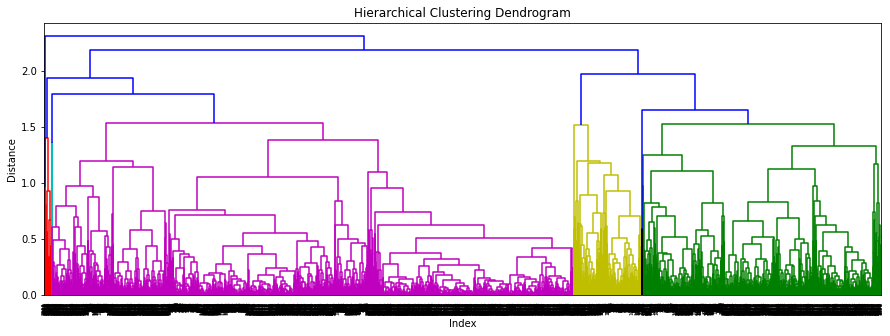

In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
ewa['clust']=cluster_labels # creating a  new column and assigning it to new column 
ewa

ID#  Balance  Qual_miles  ...  Days_since_enroll  Award?  clust
0        1    28143           0  ...               7000       0      0
1        2    19244           0  ...               6968       0      0
2        3    41354           0  ...               7034       0      0
3        4    14776           0  ...               6952       0      0
4        5    97752           0  ...               6935       1      1
...    ...      ...         ...  ...                ...     ...    ...
3994  4017    18476           0  ...               1403       1      2
3995  4018    64385           0  ...               1395       1      2
3996  4019    73597           0  ...               1402       1      2
3997  4020    54899           0  ...               1401       0      0
3998  4021     3016           0  ...               1398       0      0

[3999 rows x 13 columns]

In [16]:
ewa.iloc[:,1:].groupby(ewa.clust).mean()

Balance  Qual_miles  cc1_miles  ...  Days_since_enroll    Award?  clust
clust                                        ...                                    
0       59968.433667   88.883768   1.712224  ...        3825.392786  0.000802      0
1      157084.578462  208.673846   4.661538  ...        5770.572308  1.000000      1
2       80173.963287  248.550699   2.104895  ...        4304.383741  1.000000      2
3      131999.500000  347.000000   2.500000  ...        2200.250000  1.000000      3
4       45515.064516   32.258065   1.000000  ...        3784.258065  0.193548      4

[5 rows x 12 columns]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ewa_subset = pd.DataFrame(scaler.fit_transform(ewa.iloc[:,1:]))
ewa_subset 

0         1         2   ...        9         10        11
0    -0.451141 -0.186299 -0.769578  ...  1.395454 -0.766919 -0.730292
1    -0.539457 -0.186299 -0.769578  ...  1.379957 -0.766919 -0.730292
2    -0.320031 -0.186299 -0.769578  ...  1.411920 -0.766919 -0.730292
3    -0.583799 -0.186299 -0.769578  ...  1.372208 -0.766919 -0.730292
4     0.239678 -0.186299  1.409471  ...  1.363975  1.303918  0.332072
...        ...       ...       ...  ...       ...       ...       ...
3994 -0.547079 -0.186299 -0.769578  ... -1.315120  1.303918  1.394435
3995 -0.091465 -0.186299 -0.769578  ... -1.318994  1.303918  1.394435
3996 -0.000043 -0.186299  0.683121  ... -1.315604  1.303918  1.394435
3997 -0.185607 -0.186299 -0.769578  ... -1.316088 -0.766919 -0.730292
3998 -0.700508 -0.186299 -0.769578  ... -1.317541 -0.766919 -0.730292

[3999 rows x 12 columns]

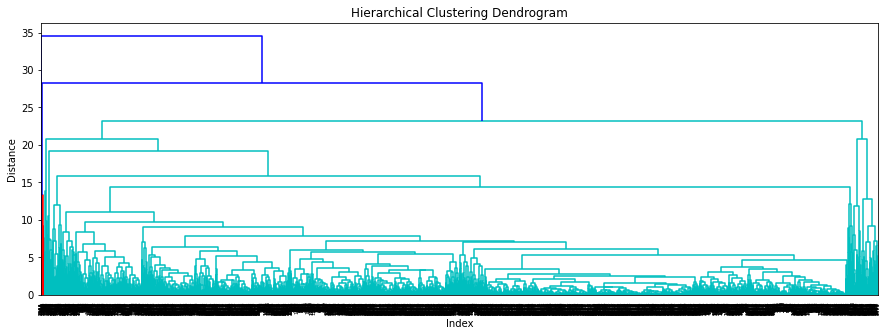

In [18]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(ewa_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(ewa_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
ewa['clust']=cluster_labels # creating a  new column and assigning it to new column 
ewa 

ID#  Balance  Qual_miles  ...  Days_since_enroll  Award?  clust
0        1    28143           0  ...               7000       0      0
1        2    19244           0  ...               6968       0      0
2        3    41354           0  ...               7034       0      0
3        4    14776           0  ...               6952       0      0
4        5    97752           0  ...               6935       1      0
...    ...      ...         ...  ...                ...     ...    ...
3994  4017    18476           0  ...               1403       1      0
3995  4018    64385           0  ...               1395       1      0
3996  4019    73597           0  ...               1402       1      0
3997  4020    54899           0  ...               1401       0      0
3998  4021     3016           0  ...               1398       0      0

[3999 rows x 13 columns]

In [22]:
k=list(range(2,20))

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

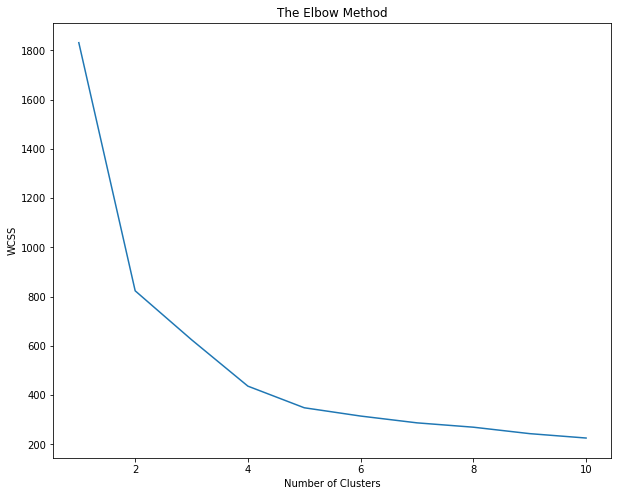

In [24]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [25]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [26]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([4, 4, 4, ..., 3, 0, 0], dtype=int32)

In [28]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
ewa['clust']=md # creating a  new column and assigning it to new column 
ewa.describe()

ID#       Balance  ...       Award?        clust
count  3999.000000  3.999000e+03  ...  3999.000000  3999.000000
mean   2014.819455  7.360133e+04  ...     0.370343     1.951738
std    1160.764358  1.007757e+05  ...     0.482957     1.506339
min       1.000000  0.000000e+00  ...     0.000000     0.000000
25%    1010.500000  1.852750e+04  ...     0.000000     0.000000
50%    2016.000000  4.309700e+04  ...     0.000000     2.000000
75%    3020.500000  9.240400e+04  ...     1.000000     3.000000
max    4021.000000  1.704838e+06  ...     1.000000     4.000000

[8 rows x 13 columns]

In [29]:
ewa.iloc[:,1:7].groupby(ewa.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles
clust                                                                          
0       33097.301357   94.131783   1.070736   1.016473   1.006783   3244.520349
1       83529.153046  290.453195   1.156018   1.032689   1.008915   8850.395245
2      118297.325243   73.467638   3.584142   1.001618   1.022654  31384.393204
3      108317.387376  198.336634   3.915842   1.001238   1.025990  45609.657178
4       49921.633641   89.903226   1.122120   1.019585   1.001152   3467.074885

Text(0.5, 1.0, 'Clusters using KMeans')

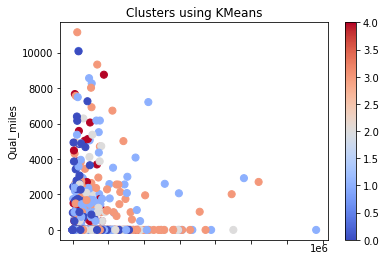

In [31]:
ewa.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

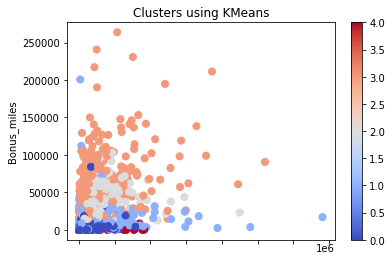

In [32]:
ewa.plot(x="Balance",y ="Bonus_miles",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [33]:
clf.inertia_

348.94342839013245

In [34]:
WCSS

[1830.7932128584107,
 823.6756984125209,
 625.1693121408771,
 436.7088576193257,
 348.943321725414,
 315.3155964842893,
 287.73481183138455,
 270.09187065810477,
 243.92551718928684,
 226.11861635972758]

DBSCAN


In [35]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [37]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("EastWestAirlines.csv");

print(df.head())
df 

   ID#  Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll  Award?
0    1    28143           0  ...                0               7000       0
1    2    19244           0  ...                0               6968       0
2    3    41354           0  ...                0               7034       0
3    4    14776           0  ...                0               6952       0
4    5    97752           0  ...                4               6935       1

[5 rows x 12 columns]


ID#  Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll  Award?
0        1    28143           0  ...                0               7000       0
1        2    19244           0  ...                0               6968       0
2        3    41354           0  ...                0               7034       0
3        4    14776           0  ...                0               6952       0
4        5    97752           0  ...                4               6935       1
...    ...      ...         ...  ...              ...                ...     ...
3994  4017    18476           0  ...                1               1403       1
3995  4018    64385           0  ...                0               1395       1
3996  4019    73597           0  ...                0               1402       1
3997  4020    54899           0  ...                1               1401       0
3998  4021     3016           0  ...                0               1398       0

[3999 rows x 12 columns]

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [39]:
df1 = df.drop(['ID#'],axis=1)

In [40]:
array=df1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [41]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [42]:
dbscan = DBSCAN(eps=0.95, min_samples=5)
dbscan.fit(X)         

DBSCAN(eps=0.95)

In [43]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [45]:
cl
pd.set_option("display.max_rows", None)

In [46]:
cl 

cluster
0           0
1           0
2           0
3           0
4           1
5           0
6           0
7           1
8          -1
9           1
10          0
11          1
12          0
13          0
14          0
15          1
16          1
17          1
18          1
19          1
20          1
21         -1
22         -1
23          0
24         -1
25          0
26          0
27          0
28          1
29          1
30          0
31          0
32         -1
33          0
34          0
35          1
36          1
37          0
38          1
39          1
40          0
41          1
42         -1
43         -1
44          0
45         -1
46          0
47          1
48          1
49          0
50         -1
51          0
52         -1
53          1
54          0
55          0
56          0
57          1
58          0
59         -1
60          0
61          0
62          0
63         -1
64          0
65         -1
66          0
67          0
68          1
69          1
70         -1
71          0
72         -1
73          0
74          0
75          0
76          0
77          0
78          1
79          1
80         -1
81          0
82          0
83          0
84          0
85          1
86          1
87         -1
88          0
89          1
90          1
91          0
92          1
93          1
94         -1
95          0
96          0
97          0
98          0
99          1
100        -1
101         1
102         0
103         1
104         0
105         1
106        -1
107         1
108         1
109         1
110         0
111        -1
112        -1
113         1
114        -1
115         0
116         0
117        -1
118         1
119         1
120         0
121        -1
122         1
123         1
124         0
125         1
126        -1
127        -1
128         1
129         1
130         1
131         1
132         1
133         1
134         1
135        -1
136         0
137         1
138         1
139         0
140         0
141         0
142         0
143         0
144         0
145         1
146         0
147         1
148         0
149         0
150         1
151        -1
152         0
153         0
154         1
155         0
156         0
157         1
158         1
159         0
160         0
161        -1
162        -1
163         1
164         1
165         0
166         0
167        -1
168        -1
169         1
170         1
171         0
172        -1
173        -1
174         0
175        -1
176         1
177        -1
178         1
179         1
180         0
181         1
182         0
183         1
184         0
185         0
186        -1
187         0
188        -1
189         0
190        -1
191        -1
192        -1
193        -1
194         1
195         0
196         1
197         0
198        -1
199         1
200         1
201        -1
202         0
203         1
204         0
205         0
206        -1
207        -1
208         1
209         0
210        -1
211         0
212         0
213         1
214        -1
215         0
216         0
217         0
218         1
219         0
220        -1
221        -1
222         1
223         0
224         0
225         0
226        -1
227         1
228         0
229         0
230         1
231         1
232         0
233         1
234         1
235         1
236         0
237        -1
238        -1
239         0
240        -1
241         1
242         0
243        -1
244        -1
245        -1
246        -1
247         1
248         1
249         0
250         0
251         0
252         0
253         1
254         1
255         0
256        -1
257         1
258         0
259        -1
260         0
261         0
262         0
263         0
264         1
265         1
266         0
267         0
268        -1
269        -1
270         1
271         1
272         1
273         0
274         0
275        -1
276         0
277        -1
278         0
279         1
280         0
281         1
282        -1
283         1
284         1
28

In [47]:
df1 = pd.concat([df,cl],axis=1) 
df1     

ID#  Balance  Qual_miles  ...  Days_since_enroll  Award?  cluster
0        1    28143           0  ...               7000       0        0
1        2    19244           0  ...               6968       0        0
2        3    41354           0  ...               7034       0        0
3        4    14776           0  ...               6952       0        0
4        5    97752           0  ...               6935       1        1
5        6    16420           0  ...               6942       0        0
6        7    84914           0  ...               6994       0        0
7        8    20856           0  ...               6938       1        1
8        9   443003           0  ...               6948       1       -1
9       10   104860           0  ...               6931       1        1
10      11    40091           0  ...               6959       0        0
11      12    96522           0  ...               6924       1        1
12      13    43382           0  ...               6924       0        0
13      14    43097           0  ...               6918       0        0
14      15    17648           0  ...               6912       0        0
15      16    28495           0  ...               6912       1        1
16      17    51890           0  ...               6910       1        1
17      18    13958           0  ...               6905       1        1
18      19    91473           0  ...               6903       1        1
19      20    23354           0  ...               6896       1        1
20      21   120576           0  ...               6896       1        1
21      22   185681        2024  ...               6896       1       -1
22      23    20584           0  ...               6884       0       -1
23      24    66275           0  ...               6884       0        0
24      25   205651         500  ...               7932       0       -1
25      26    20726           0  ...               7924       0        0
26      27    18521           0  ...               7917       0        0
27      28     8828           0  ...               7914       0        0
28      29    59763           0  ...               7907       1        1
29      30    19221           0  ...               7896       1        1
30      31   177926           0  ...               7886       0        0
31      32    10021           0  ...               7879       0        0
32      33   276571           0  ...               7872       0       -1
33      34    18047           0  ...               7868       0        0
34      35    43832           0  ...               7865       0        0
35      36   123759           0  ...               7865       1        1
36      37    23193           0  ...               7861       1        1
37      38    68666           0  ...               7861       0        0
38      39    59990           0  ...               7854       1        1
39      40     2176           0  ...               7847       1        1
40      41    34616           0  ...               7850       0        0
41      42    10470           0  ...               7840       1        1
42      43    60313           0  ...               7829       1       -1
43      44   619393           0  ...               7819       1       -1
44      45   121260           0  ...               7808       0        0
45      46   288865         967  ...               6884       1       -1
46      47    92336           0  ...               6884       0        0
47      48    36924           0  ...               6879       1        1
48      49    70312           0  ...               6875       1        1
49      50    17051           0  ...               6868       0        0
50      51   108137           0  ...               6844       0       -1
51      52     1300           0  ...               6868       0        0
52      53   118531           0  ...               6868       1       -1
53      54   121395           0  ...               6889       1  

In [48]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

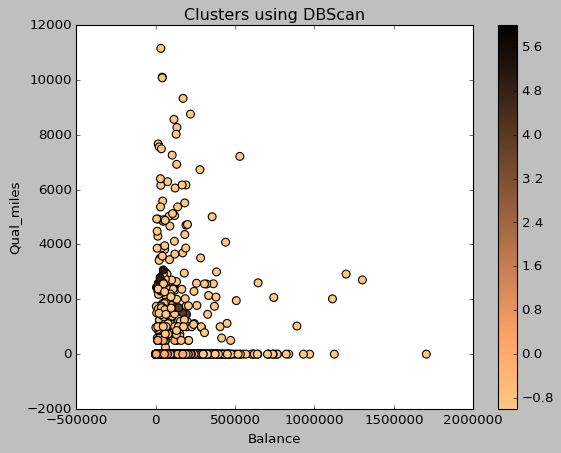

In [49]:
df1.plot(x="Balance",y ="Qual_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

Text(0.5, 1.0, 'Clusters using DBScan')

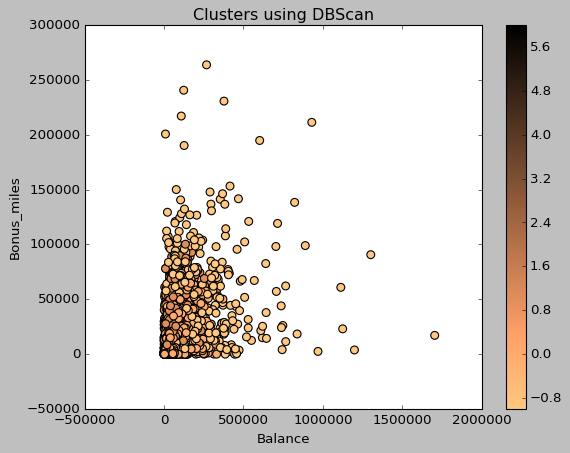

In [51]:
df1.plot(x="Balance",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [52]:
dl = dbscan.labels_

In [53]:
from sklearn import metrics

In [54]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)

0.18564846327937293

In [55]:
from sklearn import metrics

In [56]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [57]:
y_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [58]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

Kcluster
0            1
1            1
2            1
3            1
4            0
5            1
6            0
7            1
8            2
9            0
10           1
11           0
12           1
13           1
14           1
15           0
16           0
17           1
18           0
19           0
20           0
21           2
22           1
23           1
24           1
25           1
26           1
27           1
28           0
29           1
30           0
31           1
32           0
33           1
34           1
35           0
36           1
37           1
38           0
39           1
40           1
41           0
42           2
43           0
44           0
45           0
46           1
47           1
48           0
49           1
50           2
51           1
52           0
53           1
54           1
55           1
56           0
57           1
58           0
59           0
60           0
61           1
62           1
63           1
64           1
65           2
66           1
67           0
68           0
69           0
70           0
71           0
72           0
73           1
74           0
75           0
76           1
77           0
78           0
79           0
80           1
81           1
82           1
83           1
84           1
85           0
86           1
87           0
88           1
89           1
90           1
91           1
92           0
93           1
94           2
95           1
96           1
97           0
98           1
99           0
100          0
101          1
102          1
103          1
104          1
105          0
106          0
107          1
108          0
109          0
110          0
111          2
112          2
113          1
114          0
115          0
116          1
117          0
118          0
119          1
120          1
121          0
122          0
123          0
124          0
125          0
126          0
127          2
128          0
129          0
130          1
131          1
132          1
133          1
134          0
135          2
136          0
137          0
138          0
139          1
140          1
141          1
142          1
143          0
144          0
145          1
146          1
147          0
148          0
149          1
150          0
151          0
152          0
153          1
154          0
155          0
156          0
157          0
158          0
159          1
160          0
161          0
162          1
163          0
164          0
165          1
166          1
167          0
168          0
169          0
170          0
171          1
172          0
173          0
174          0
175          0
176          0
177          0
178          1
179          1
180          1
181          0
182          1
183          0
184          0
185          0
186          2
187          1
188          0
189          1
190          0
191          2
192          0
193          1
194          1
195          1
196          0
197          0
198          1
199          0
200          0
201          0
202          1
203          0
204          1
205          1
206          0
207          1
208          0
209          1
210          0
211          1
212          1
213          0
214          1
215          0
216          1
217          1
218          0
219          0
220          2
221          0
222          1
223          1
224          0
225          1
226          1
227          0
228          1
229          0
230          0
231          0
232          1
233          0
234          1
235          0
236          1
237          0
238          2
239          1
240          0
241          1
242          0
243          2
244          0
245          2
246          1
247          1
248          0
249          1
250          1
251          1
252          0
253          0
254          1
255          0
256          2
257          0
258          1
259          0
260          1
261          1
262          1
263          1
264          1
265          0
2

In [59]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

ID#  Balance  Qual_miles  ...  Award?  cluster  Kcluster
0        1    28143           0  ...       0        0         1
1        2    19244           0  ...       0        0         1
2        3    41354           0  ...       0        0         1
3        4    14776           0  ...       0        0         1
4        5    97752           0  ...       1        1         0
5        6    16420           0  ...       0        0         1
6        7    84914           0  ...       0        0         0
7        8    20856           0  ...       1        1         1
8        9   443003           0  ...       1       -1         2
9       10   104860           0  ...       1        1         0
10      11    40091           0  ...       0        0         1
11      12    96522           0  ...       1        1         0
12      13    43382           0  ...       0        0         1
13      14    43097           0  ...       0        0         1
14      15    17648           0  ...       0        0         1
15      16    28495           0  ...       1        1         0
16      17    51890           0  ...       1        1         0
17      18    13958           0  ...       1        1         1
18      19    91473           0  ...       1        1         0
19      20    23354           0  ...       1        1         0
20      21   120576           0  ...       1        1         0
21      22   185681        2024  ...       1       -1         2
22      23    20584           0  ...       0       -1         1
23      24    66275           0  ...       0        0         1
24      25   205651         500  ...       0       -1         1
25      26    20726           0  ...       0        0         1
26      27    18521           0  ...       0        0         1
27      28     8828           0  ...       0        0         1
28      29    59763           0  ...       1        1         0
29      30    19221           0  ...       1        1         1
30      31   177926           0  ...       0        0         0
31      32    10021           0  ...       0        0         1
32      33   276571           0  ...       0       -1         0
33      34    18047           0  ...       0        0         1
34      35    43832           0  ...       0        0         1
35      36   123759           0  ...       1        1         0
36      37    23193           0  ...       1        1         1
37      38    68666           0  ...       0        0         1
38      39    59990           0  ...       1        1         0
39      40     2176           0  ...       1        1         1
40      41    34616           0  ...       0        0         1
41      42    10470           0  ...       1        1         0
42      43    60313           0  ...       1       -1         2
43      44   619393           0  ...       1       -1         0
44      45   121260           0  ...       0        0         0
45      46   288865         967  ...       1       -1         0
46      47    92336           0  ...       0        0         1
47      48    36924           0  ...       1        1         1
48      49    70312           0  ...       1        1         0
49      50    17051           0  ...       0        0         1
50      51   108137           0  ...       0       -1         2
51      52     1300           0  ...       0        0         1
52      53   118531           0  ...       1       -1         0
53      54   121395           0  ...       1        1         1
54      55    38348           0  ...       0        0         1
55      56    14448           0  ...       0        0         1
56      57    75971           0  ...       0        0         0
57      58    36298           0  ...       1        1         1
58      59    38077           0  ...       0        0         0
59      60    95118           0  ...       1       -1         0
60      61   134457           0  ...       0        0         0
61      62    19918           0  ...   

Text(0.5, 1.0, 'Clusters using KMeans')

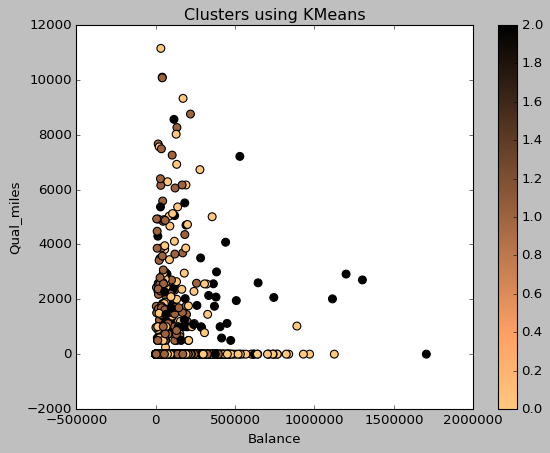

In [61]:
df2.plot(x="Balance",y ="Qual_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

Text(0.5, 1.0, 'Clusters using KMeans')

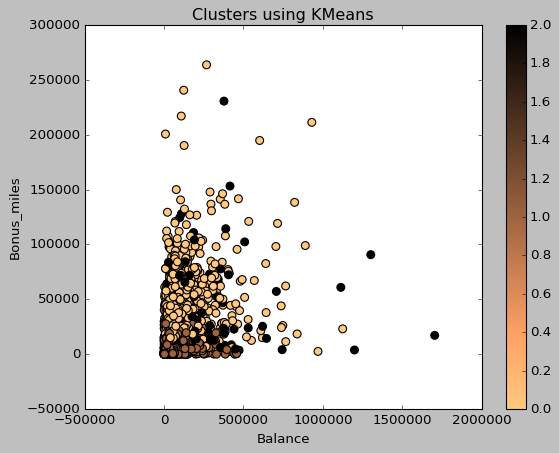

In [62]:
df2.plot(x="Balance",y ="Bonus_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

In [63]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.31191384766627117